## 1)As an investor would investing in HDBs be viable?

## 2)If so,what would be some prime properties worth investing in?

In [98]:
#Import the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from scipy.stats.stats import pearsonr
from scipy import stats

In [99]:
#Rent dataset
rent = pd.read_csv('median-rent-by-town-and-flat-type.csv')
rent = rent.replace(['na','-'],np.NaN)
rent_dropped = rent.dropna(axis = 0)
rent_dropped['median_rent'] = rent_dropped['median_rent'].astype(float)#convert it to float so as to be able to plot

rent_dropped['quarter'] = rent_dropped['quarter'].apply(lambda x: x.replace('-Q1',''))
rent_dropped['quarter'] = rent_dropped['quarter'].apply(lambda x: x.replace('-Q2',''))
rent_dropped['quarter'] = rent_dropped['quarter'].apply(lambda x: x.replace('-Q3',''))
rent_dropped['quarter'] = rent_dropped['quarter'].apply(lambda x: x.replace('-Q4',''))

rent_dropped['quarter'] = rent_dropped['quarter'].astype(int)


C:\Users\Isaac\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Isaac\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Isaac\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.py

In [205]:
print("Number of Data by Room Type")
for i in rent_dropped['flat_type'].unique():
    print("{}:{}".format(i,rent_dropped[rent_dropped['flat_type'] == i]['flat_type'].count()))

Number of Data by Room Type
3-RM:961
4-RM:1165
5-RM:999
EXEC:439
2-RM:34


In [101]:
rent_dropped_2RM = rent_dropped.drop(rent_dropped[rent_dropped['flat_type'] == '2-RM'].index,axis = 0)#drop rows with 2-RM
rent_dropped_2RM = rent_dropped_2RM.rename(columns = {"quarter":"year"})#rename from quarter to year

NorthEast = ['ANG MO KIO','HOUGANG','PUNGGOL','SENGKANG','SERANGOON'] 
East = ['BEDOK','PASIR RIS','TAMPINES'] 
North = ['SEMBAWANG','WOODLANDS','YISHUN'] 
Central = ['BISHAN','BUKIT MERAH','BUKIT TIMAH','CENTRAL','CENTRAL AREA','GEYLANG','KALLANG/WHAMPOA','MARINE PARADE','QUEENSTOWN','TOA PAYOH'] 
West = ['BUKIT BATOK','BUKIT PANJANG','CHOA CHU KANG','CLEMENTI','JURONG EAST','JURONG WEST'] 

def sorter(x):
    if x in NorthEast:
        return 'North-East'
    elif x in East:
        return 'East'
    elif x in North:
        return 'North'
    elif x in Central:
        return 'Central'
    elif x in West:
        return 'West'
    else:
        print('Invalid town: {}'.format(x))
rent_dropped_2RM = rent_dropped_2RM.assign(region=[sorter(x) for x in rent_dropped_2RM['town']])


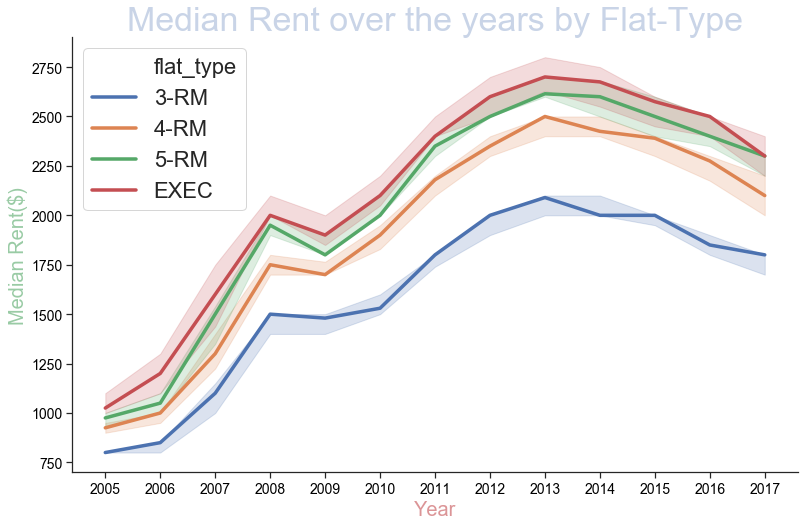

In [187]:
#Line plot

#Set style
#sns.set(style = 'ticks')
sns.set_style("ticks")

#Plotting

g = sns.lineplot(x = 'year',y = 'median_rent',data = rent_dropped_2RM,hue = 'flat_type',estimator=np.median)

g.figure.set_size_inches(13,8)
g.set_xlabel('Year',size=20,color="r",alpha=0.6)
g.set_ylabel('Median Rent($)',size=20,color="g",alpha=0.6)
g.set_title('Median Rent over the years by Flat-Type',fontsize=34,color="b",alpha=0.3)
g.set(xticks=rent_dropped_2RM['year'].unique())
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 3.5})

sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)

# Set the ticklabel size and color of the graph from here
g.tick_params(labelsize=14,labelcolor="black")

Text(0.5, 1.0, 'Year vs Median Rent(Simple Linear Regression)')

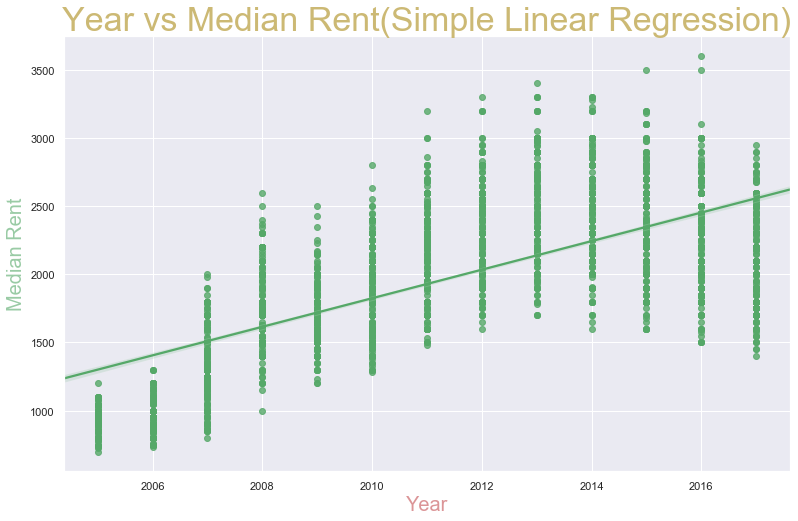

In [169]:
g = sns.regplot("year", "median_rent", data=rent_dropped_2RM,color="g")

sns.set(style="darkgrid")
#Customizations
g.figure.set_size_inches(13,8)
g.set_xlabel('Year',size=20,color="r",alpha=0.6)
g.set_ylabel('Median Rent',size=20,color="g",alpha=0.6)
g.set_title('Year vs Median Rent(Simple Linear Regression)',fontsize=34,color="y")


In [106]:
print("Regression Analysis: Median Rent vs Year(Hypothesis Test for Slope of Regression Line)\n")
slope, intercept, r_value, p_value, std_err = stats.linregress(rent_dropped_2RM['year'],rent_dropped_2RM['median_rent'])
print("Regression Equation: {} = {} + {}{}".format("Median Rent",intercept,slope," Year"))
print("R-sq: {}%".format((r_value ** 2) * 100))
print("P-value: {}".format(p_value))

Regression Analysis: Median Rent vs Year(Hypothesis Test for Slope of Regression Line)

Regression Equation: Median Rent = -208704.3976933798 + 104.74069894640377 Year
R-sq: 45.650870257286705%
P-value: 0.0


In [107]:
print("Correlation:Median Rent,Year(Hypothesis Test for Population Correlation Coefficient):\n")
HTfPCC = stats.pearsonr(rent_dropped_2RM['year'],rent_dropped_2RM['median_rent'])
print("Correlations")
print("Pearson correlation: {}".format(HTfPCC[0]))
print("P-value: {}".format(HTfPCC[1]))

Correlation:Median Rent,Year(Hypothesis Test for Population Correlation Coefficient):

Correlations
Pearson correlation: 0.6756542774029244
P-value: 0.0


In [108]:
#HDB price dataset
resale = pd.read_csv('resale-flat-prices-based-on-approval-date-1990-onwards.csv')

In [109]:
resale_by_year = resale
for i in range(0,10):#remove the months to make it a year
    resale_by_year['month'] = resale_by_year['month'].apply(lambda x: x.replace('-0' + str(i),''))
    resale_by_year['month'] = resale_by_year['month'].apply(lambda x: x.replace('-1' + str(i),''))
    
resale_by_year = resale_by_year.rename(columns = {"month":"year"})#rename from month to year

In [111]:
resale_by_year['year'] = resale_by_year['year'].astype(int)

rows_to_be_dropped = []
for i in range(1990,2005):#to have an equal comparison since rent only has 2005-2017
    rows_to_be_dropped += resale_by_year[resale_by_year['year'] == i].index.tolist()
rows_to_be_dropped += resale_by_year[resale_by_year['year'] == 2018].index.tolist()

resale_by_year_dropped = resale_by_year.drop(rows_to_be_dropped,axis = 0)#drops all years not included in rent dataset
resale_by_year_dropped = resale_by_year_dropped.drop(resale_by_year_dropped[resale_by_year_dropped['flat_type'] == 'MULTI-GENERATION'].index,axis = 0)
resale_by_year_dropped = resale_by_year_dropped.drop(resale_by_year_dropped[resale_by_year_dropped['flat_type'] == '1 ROOM'].index,axis = 0)
resale_by_year_dropped = resale_by_year_dropped.drop(resale_by_year_dropped[resale_by_year_dropped['flat_type'] == '2 ROOM'].index,axis = 0)#dropped Multi-Generation because the rent dataset does not have it and also in 2014-2016 there is very little data

resale_by_year_dropped = resale_by_year_dropped.assign(region=[sorter(x) for x in resale_by_year_dropped['town']])

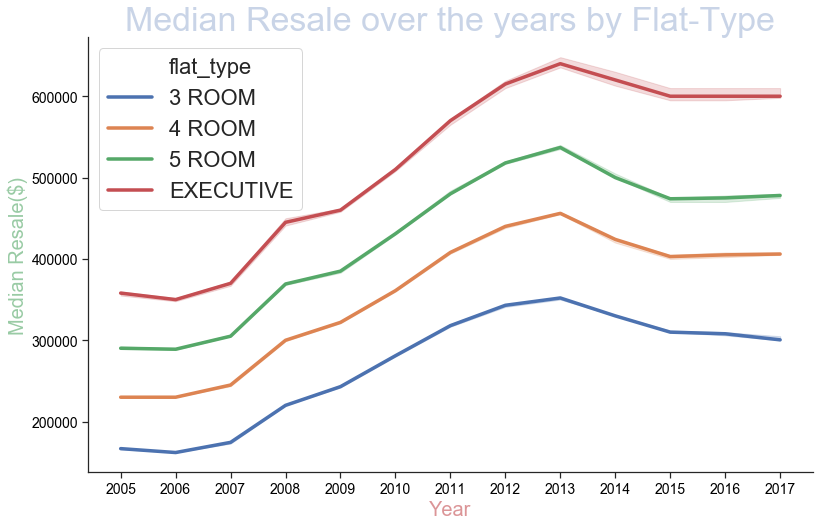

In [186]:
#Line plot

#Set style
#sns.set(style = 'ticks')
sns.set_style("ticks")

#Plotting

g = sns.lineplot(x = 'year',y = 'resale_price',data = resale_by_year_dropped,hue = 'flat_type',estimator=np.median)

#Customization

g.figure.set_size_inches(13,8)
g.set_xlabel('Year',size=20,color="r",alpha=0.6)
g.set_ylabel('Median Resale($)',size=20,color="g",alpha=0.6)
g.set_title('Median Resale over the years by Flat-Type',fontsize=34,color="b",alpha=0.3)
#g.set_xticks(range(len(resale_by_year_dropped['year'].unique())))
#g.set_xticklabels(resale_by_year_dropped['year'].unique())
g.set(xticks=resale_by_year_dropped['year'].unique())
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 3.5})

# Set the ticklabel size and color of the graph from here
g.tick_params(labelsize=14,labelcolor="black")

Text(0.5, 1.0, 'Year vs Resale(Simple Linear Regression)')

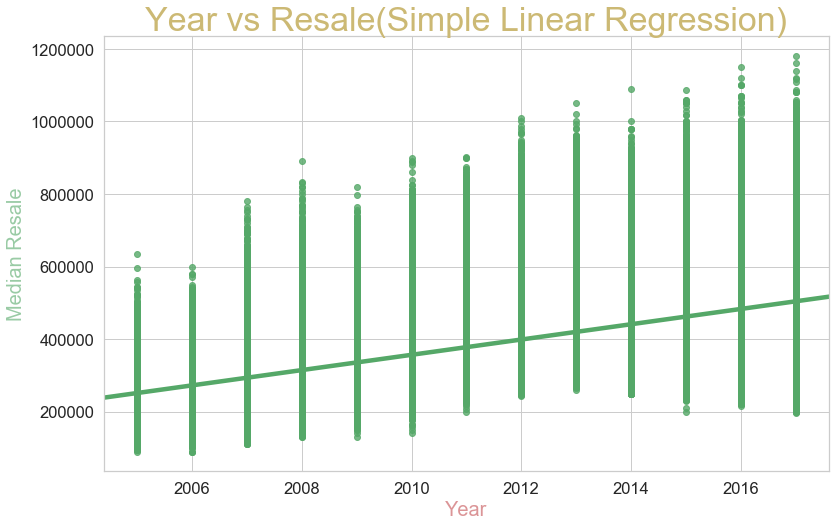

In [168]:
g = sns.regplot("year", "resale_price", data=resale_by_year_dropped,color="g")

sns.set(style="darkgrid")
#Customizations
g.figure.set_size_inches(13,8)
g.set_xlabel('Year',size=20,color="r",alpha=0.6)
g.set_ylabel('Median Resale',size=20,color="g",alpha=0.6)
g.set_title('Year vs Resale(Simple Linear Regression)',fontsize=34,color="y")


In [114]:
print("Regression Analysis: Median Rent vs Year(Hypothesis Test for Slope of Regression Line)\n")
slope, intercept, r_value, p_value, std_err = stats.linregress(resale_by_year_dropped['year'],resale_by_year_dropped['resale_price'])
print("Regression Equation: {} = {} + {}{}".format("Resale Price",intercept,slope," Year"))
print("R-sq: {}%".format((r_value ** 2) * 100))
print("P-value: {}".format(p_value))

Regression Analysis: Median Rent vs Year(Hypothesis Test for Slope of Regression Line)

Regression Equation: Resale Price = -41988935.40486135 + 21067.469366852023 Year
R-sq: 31.857566962030432%
P-value: 0.0


In [115]:
print("Correlation:Median Rent,Year(Hypothesis Test for Population Correlation Coefficient):\n")
HTfPCC = stats.pearsonr(resale_by_year_dropped['year'],resale_by_year_dropped['resale_price'])
print("Correlations")
print("Pearson correlation: {}".format(HTfPCC[0]))
print("P-value: {}".format(HTfPCC[1]))

Correlation:Median Rent,Year(Hypothesis Test for Population Correlation Coefficient):

Correlations
Pearson correlation: 0.5644250788371419
P-value: 0.0


In [181]:
def f(FlatType):
    if FlatType == 'Overall':
        g = sns.boxplot(x="median_rent", y="flat_type", data=rent_dropped_2RM,palette = 'coolwarm')
        sns.set(style="whitegrid")
        g.figure.set_size_inches(9,6)
        g.set_xlabel('Median Rent',size=25,color="g",alpha=0.6)
        g.set_ylabel('Flat Type ',size=25,color="r",alpha=0.6)
        g.set_title('Overall Rent of HDBs by Flat Type',fontsize=35,color="b",alpha=0.3)
        sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)
        sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 3})
    else:
        g = sns.boxplot(x=rent_dropped_2RM[rent_dropped_2RM['flat_type'] == FlatType]["median_rent"], y=rent_dropped_2RM[rent_dropped_2RM['flat_type'] == FlatType]['region'], data=rent_dropped_2RM,palette = 'coolwarm')
        sns.set(style="whitegrid")
        g.figure.set_size_inches(9,6)
        g.set_xlabel('Median Rent',size=25,color="g",alpha=0.6)
        g.set_ylabel('Region ',size=25,color="r",alpha=0.6)
        g.set_title('Overall Rent of {} by Region'.format(FlatType),fontsize=35,color="b",alpha=0.3)
        sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)
        sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 3})

interact(f, FlatType=['Overall','3-RM','4-RM','5-RM','EXEC'])

interactive(children=(Dropdown(description='FlatType', options=('Overall', '3-RM', '4-RM', '5-RM', 'EXEC'), va…

<function __main__.f(FlatType)>

In [182]:
def f(FlatType):
    if FlatType == 'Overall':
        g = sns.boxplot(x='resale_price', y='flat_type', data=resale_by_year_dropped,palette = 'cubehelix')
        sns.set(style="whitegrid")
        g.figure.set_size_inches(9,6)
        g.set_xlabel('Resale Price',size=25,color="g",alpha=0.6)
        g.set_ylabel('Flat Type',size=25,color="r",alpha=0.6)
        g.set_title('Overall Resale Price of HDBs by Flat Type',fontsize=35,color="b",alpha=0.3)
        sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)
        sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 3})
    else:
        g = sns.boxplot(x=resale_by_year_dropped[resale_by_year_dropped['flat_type'] == FlatType]['resale_price'], y=resale_by_year_dropped[resale_by_year_dropped['flat_type'] == FlatType]['region'], data=resale_by_year_dropped,palette = 'cubehelix')
        sns.set(style="whitegrid")
        g.figure.set_size_inches(9,6)
        g.set_xlabel('Resale Price',size=25,color="g",alpha=0.6)
        g.set_ylabel('Flat Type',size=25,color="r",alpha=0.6)
        g.set_title('Overall Resale Price of {} by Region'.format(FlatType),fontsize=35,color="b",alpha=0.3)
        sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)
        sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 3})

interact(f, FlatType=['Overall','3 ROOM','4 ROOM','5 ROOM','EXECUTIVE']);

interactive(children=(Dropdown(description='FlatType', options=('Overall', '3 ROOM', '4 ROOM', '5 ROOM', 'EXEC…

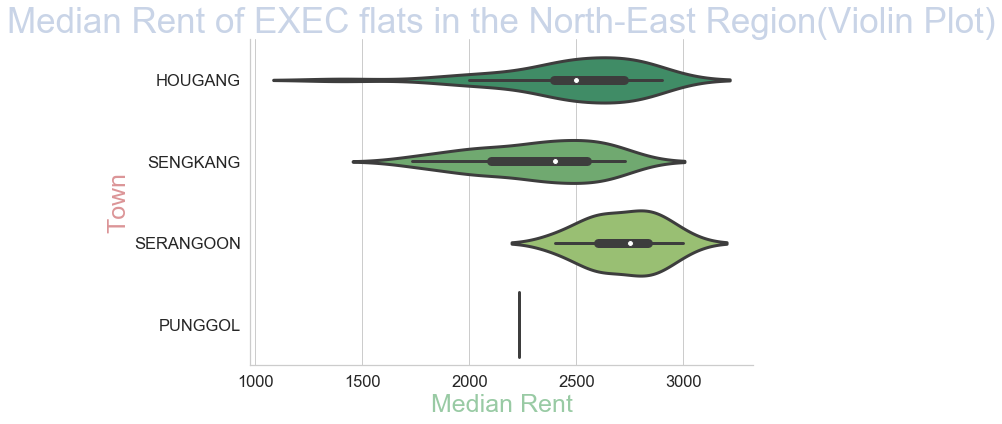

In [183]:
g = sns.violinplot(x=rent_dropped_2RM[(rent_dropped_2RM['flat_type'] == 'EXEC')&(rent_dropped_2RM['region'] == 'North-East')]['median_rent'], y=rent_dropped_2RM[(rent_dropped_2RM['flat_type'] == 'EXEC')&(rent_dropped_2RM['region'] == 'North-East')]['town'],data=rent_dropped_2RM, palette="summer")
g.figure.set_size_inches(9,6)
g.set_xlabel('Median Rent',size=25,color="g",alpha=0.6)
g.set_ylabel('Town',size=25,color="r",alpha=0.6)
g.set_title('Median Rent of EXEC flats in the North-East Region(Violin Plot)',fontsize=35,color="b",alpha=0.3)
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 3})

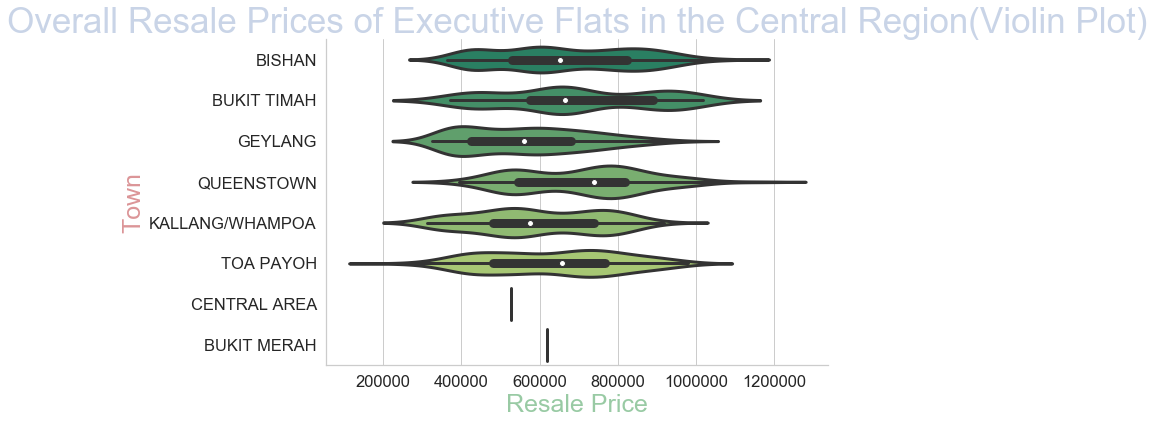

In [184]:
g = sns.violinplot(x=resale_by_year_dropped[(resale_by_year_dropped['flat_type'] == 'EXECUTIVE')&(resale_by_year_dropped['region'] == 'Central')]['resale_price'], y=resale_by_year_dropped[(resale_by_year_dropped['flat_type'] == 'EXECUTIVE')&(resale_by_year_dropped['region'] == 'Central')]['town'],data=rent_dropped_2RM, palette="summer")
g.figure.set_size_inches(9,6)
g.set_xlabel('Resale Price',size=25,color="g",alpha=0.6)
g.set_ylabel('Town',size=25,color="r",alpha=0.6)
g.set_title('Overall Resale Prices of Executive Flats in the Central Region(Violin Plot)',fontsize=35,color="b",alpha=0.3)
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.25})